In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')
print(data.shape)
data.head()

(489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


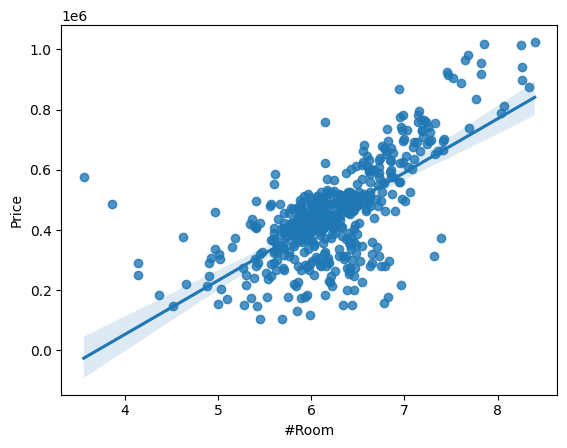

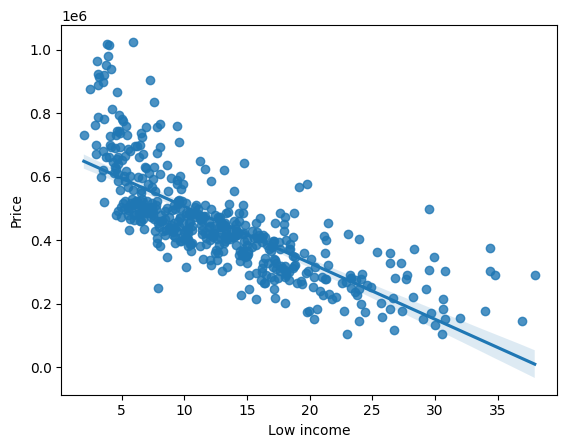

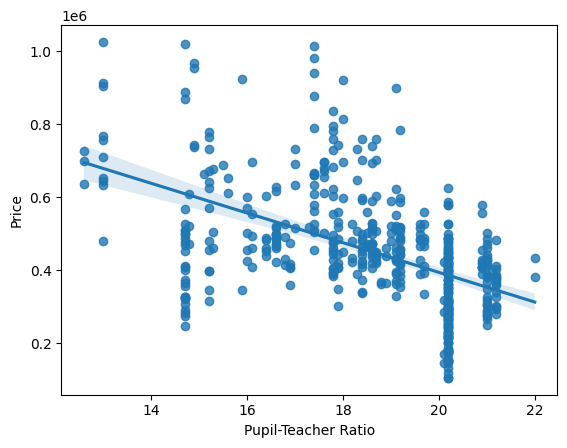

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
def check_feature(data, feature, xlabel, target = 'MEDV', ylabel = 'Price'):
  plt.figure()
  sns.regplot(x=feature, y=target, data=data)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

check_feature(data, 'RM', '#Room')
check_feature(data, 'LSTAT', 'Low income')
check_feature(data, 'PTRATIO', 'Pupil-Teacher Ratio')

In [11]:
import numpy as np
t = np.array([0,1,2,3])
ypred = 0.5 * 9.8 * t
y = ypred+np.random.normal(size=ypred.shape,scale=0.1)

In [12]:
df = pd.DataFrame({'t':t, 'dy': y, 'prediction': ypred})
df[['t','dy','prediction']]

,t,dy,prediction
0,0,-0.079880,0.0
1,1,4.944109,4.9
2,2,9.919412,9.8
3,3,14.687745,14.7


In [13]:
np.mean( (y-ypred)**2 )

0.005683985629632276

In [14]:
X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data[['MEDV']]

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_, linreg.intercept_

(array([[ 86565.23613299, -10849.34038381, -19492.11563515]]),
 array([415464.39651673]))

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, linreg.predict(X))**0.5

87769.84413151712

In [17]:
from sklearn.metrics import r2_score
r2_score(y, linreg.predict(X))

0.7176275212982739

In [18]:
ypred = linreg.predict(X)

Text(0, 0.5, 'Prediction')

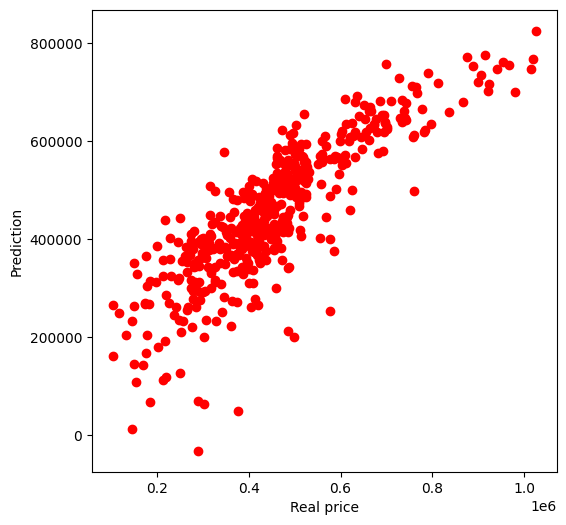

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y, ypred, c='red')
plt.xlabel('Real price')
plt.ylabel('Prediction')

In [20]:
linreg.coef_, linreg.intercept_

(array([[ 86565.23613299, -10849.34038381, -19492.11563515]]),
 array([415464.39651673]))

In [21]:
def run_model(model, score, X, y):
  model.fit(X,y)
  ypred = model.predict(X)
  s = score(y, ypred)
  return model, s

model, s = run_model(LinearRegression(), mean_squared_error, X, y)

In [22]:
model

LinearRegression()

In [23]:
s

7703545538.8708105

In [24]:
from sklearn.tree import DecisionTreeRegressor
model, score = run_model(DecisionTreeRegressor(), mean_squared_error, X, y)
print(score, score**0.5)

0.0 0.0


In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=42, test_size=0.2)

In [27]:
def run_model(model, score, X, y, Xt, yt):
  model.fit(X,y)
  ypred = model.predict(Xt)
  s = score(yt, ypred)
  return model, s

model_linear, score_linear = run_model(LinearRegression(), mean_squared_error, Xtrain, ytrain, Xtest, ytest)


In [28]:
model_linear

LinearRegression()

In [29]:
score_linear

6789025559.265892

In [30]:
model_decision_tree, score_decision_tree = run_model(DecisionTreeRegressor(), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

In [31]:
run_model(DecisionTreeRegressor(max_depth=7), mean_squared_error, Xtrain, ytrain, Xtest, ytest)


(DecisionTreeRegressor(max_depth=7), 4973791416.5693035)

In [32]:
irange = np.arange(1,11)
score = np.zeros(irange.shape)
for i in irange:
  _, score[i-1] = run_model(DecisionTreeRegressor(max_depth=i), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

In [33]:
df = pd.DataFrame({'depth':irange, 'L':score, 'L^0.5':score**0.5})
df[['depth','L','L^0.5']]

,depth,L,L^0.5
0,1,1.484355e+10,121834.091648
1,2,6.994706e+09,83634.360031
2,3,5.118436e+09,71543.244497
3,4,3.428515e+09,58553.524750
4,5,3.858735e+09,62118.719292
5,6,4.614985e+09,67933.679345
6,7,4.917946e+09,70128.071530
7,8,5.129965e+09,71623.772994
8,9,5.189706e+09,72039.615802
9,10,5.405237e+09,73520.314877


Text(0, 0.5, 'Price deviation')

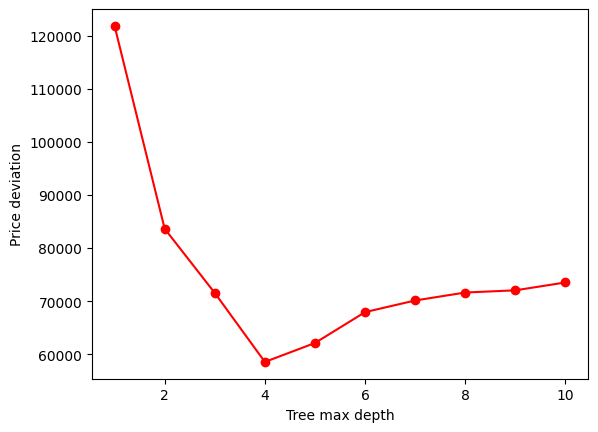

In [34]:
plt.figure()
plt.plot(df['depth'], df['L^0.5'], 'o-', color='r')
plt.xlabel('Tree max depth')
plt.ylabel('Price deviation')

In [35]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
mse = -cross_val_score(LinearRegression(), X, y, cv = cv, scoring='neg_mean_squared_error')
np.mean(mse**0.5), np.std(mse**0.5)

(87319.50484015327, 6404.222269092278)

In [37]:

from sklearn.tree import DecisionTreeRegressor
s = []
irange = np.arange(1,11)
for i in irange:
  mse = -cross_val_score(DecisionTreeRegressor(max_depth=i), X, y, cv = cv, scoring='neg_mean_squared_error')
  print( [np.mean(mse**0.5), np.std(mse**0.5)] )
  s.append( [np.mean(mse**0.5), np.std(mse**0.5)] )
s = np.array(s)

[130473.77738584648, 10216.243769210874]
[97632.33710852657, 7372.075361928177]
[80870.64644073714, 6134.813818816581]
[73712.96656847096, 7106.127427326242]
[77882.53382178763, 9679.252050824836]
[79557.5028918793, 9582.434221185402]
[82866.68293949954, 9246.491258342885]
[86812.1423589311, 9620.83856517399]
[86859.82065698068, 8887.613158464976]
[88494.04473623565, 9733.751313419774]


Text(0, 0.5, 'Price deviation')

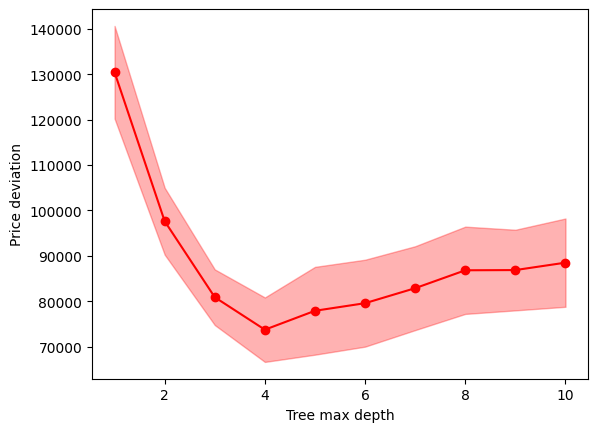

In [38]:
plt.figure()
plt.plot(irange, s[:,0], 'o-', color='r')
plt.fill_between(irange, s[:,0]-s[:,1], s[:,0]+s[:,1], alpha=0.3, color='r')
plt.xlabel('Tree max depth')
plt.ylabel('Price deviation')

In [39]:
from sklearn.tree import DecisionTreeRegressor
s = []
irange = np.arange(1,11)
for i in irange:
  mse = cross_val_score(DecisionTreeRegressor(max_depth=i), X, y, cv = cv, scoring='r2')
  print( [np.mean(mse), np.std(mse)] )
  s.append( [np.mean(mse), np.std(mse)] )
s = np.array(s)

[0.37171963934083185, 0.0662588559025254]
[0.6456695707120506, 0.058664155793669244]
[0.7576288144564469, 0.03365764825071736]
[0.7956017808215181, 0.04135474741917467]
[0.7781657933559745, 0.035103766652100785]
[0.7605242894295507, 0.04932409143963757]
[0.7468094987273843, 0.06253149850489961]
[0.727758761557485, 0.04042107337592479]
[0.7193024550743148, 0.06965075903512045]
[0.7011708172279028, 0.06580205523604814]


Text(0, 0.5, 'r2')

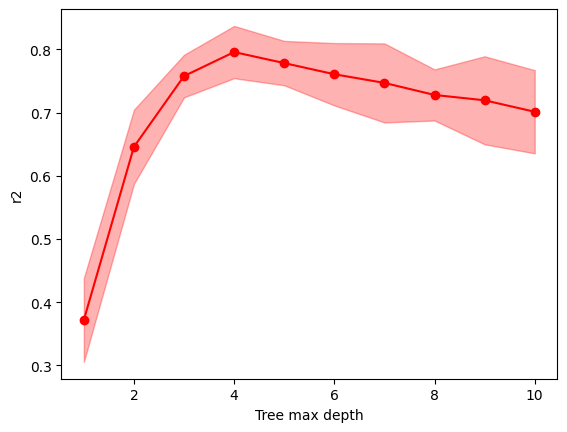

In [40]:
plt.figure()
plt.plot(irange, s[:,0], 'o-', color='r')
plt.fill_between(irange, s[:,0]-s[:,1], s[:,0]+s[:,1], alpha=0.3, color='r')
plt.xlabel('Tree max depth')
plt.ylabel('r2')